### Preparing the dataset

In [1]:
#Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings
import mglearn

In [2]:
#Reading the csv file
phishing = pd.read_csv("phishing data.csv")

In [3]:
#Display of the data
phishing.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


### Splitting the data into a training set and a test set

In [38]:
#Splitting the data into the data, X, and the target, y
X = phishing.drop('status', axis=1).drop("url", axis=1)
y = phishing['status'].replace({"phishing":1, "legitimate":0}, regex=True)

print("x has shape", X.shape)
print("y has shape", y.shape)

x has shape (11430, 87)
y has shape (11430,)


In [39]:
#Splitting the data into a train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

print("X_train has shape", X_train.shape)
print("X_test has shape", X_test.shape)
print("y_train has shape", y_train.shape)
print("y_test has shape", y_test.shape)

X_train has shape (8572, 87)
X_test has shape (2858, 87)
y_train has shape (8572,)
y_test has shape (2858,)


### Scaling the data

In [40]:
#Code for scaling
phishingscaled = StandardScaler().fit(X_train, y_train)
X_train = phishingscaled.fit_transform(X_train)
X_test = phishingscaled.fit_transform(X_test)

### Linear Support Vector Classifier

In [41]:
#Linear Regression
from sklearn.svm import LinearSVC

linsvc = LinearSVC().fit(X_train, y_train)

print("Accuracy on training set: {:.4f}".format(linsvc.score(X_train, y_train)))
print("Accuracy on test set: {:.4f}".format(linsvc.score(X_test, y_test)))

Accuracy on training set: 0.9503
Accuracy on test set: 0.9388


In [9]:
#Coefficients
linsvccoefs=linsvc.coef_[0]

sort = sorted((zip(phishing, linsvccoefs)), key = lambda e:e[1], reverse = True)

abs_linsvc_coef = abs(linsvccoefs)
abs_sort = sorted((zip(phishing, abs_linsvc_coef)), key = lambda e:e[1], reverse = True)

print('\nLowest coefficients:', (str(sort[-3:])))
print('\nHighest coefficients:', str(sort[:3]))
print('\nCoefficients closest to zero:', (str(abs_sort[-3:])))


Lowest coefficients: [('nb_space', -0.31376211607180743), ('google_index', -0.4900854649387314), ('avg_words_raw', -0.5364921447159244)]

Highest coefficients: [('shortest_word_path', 1.6493750181717488), ('nb_comma', 0.5464377650124547), ('dns_record', 0.48849808917844795)]

Coefficients closest to zero: [('ratio_extRedirection', 0.0), ('links_in_tags', 0.0), ('ratio_extMedia', 0.0)]


### Logistic Regression

In [43]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=0).fit(X_train, y_train)

print("Accuracy on training set: {:.4f}".format(logreg.score(X_train, y_train)))
print("Accuracy on test set: {:.4f}".format(logreg.score(X_test, y_test)))

Accuracy on training set: 0.9504
Accuracy on test set: 0.9398


In [11]:
#Coefficients
logregcoefs=logreg.coef_[0]

sort = sorted((zip(phishing, logregcoefs)), key = lambda e:e[1], reverse = True)

abs_logreg_coef = abs(logregcoefs)
abs_sort = sorted((zip(phishing, abs_logreg_coef)), key = lambda e:e[1], reverse = True)

print('\nLowest coefficients:', (str(sort[-3:])))
print('\nHighest coefficients:', str(sort[:3]))
print('\nCoefficients closest to zero:', (str(abs_sort[-3:])))


Lowest coefficients: [('nb_space', -1.0837601393072518), ('avg_words_raw', -1.096919599989223), ('google_index', -1.6170434994392224)]

Highest coefficients: [('shortest_word_path', 3.7470588745419016), ('avg_word_path', 1.6308210108576306), ('nb_comma', 1.60851224709512)]

Coefficients closest to zero: [('ratio_extRedirection', 0.0), ('links_in_tags', 0.0), ('ratio_extMedia', 0.0)]


In [51]:
#test of c values
warnings.filterwarnings('ignore')
list = []
values = [0.0001, 0.001, 0.1, 1, 10, 50, 100]

for c in values:
    logreg_c = LogisticRegression(C = c).fit(X_train, y_train)
    accuracy = (logreg_c.score(X_test, y_test), logreg_c.score(X_train, y_train), c)
    list.append(accuracy)

for z in sorted(list, key = lambda e:e[0], reverse=True):
    print('Test accuracy: {:.4f}, Train accuracy: {:.4f}, C value: {}'.format(z[0], z[1], z[2],))

Test accuracy: 0.9398, Train accuracy: 0.9504, C value: 1
Test accuracy: 0.9398, Train accuracy: 0.9510, C value: 10
Test accuracy: 0.9395, Train accuracy: 0.9490, C value: 0.1
Test accuracy: 0.9395, Train accuracy: 0.9510, C value: 50
Test accuracy: 0.9391, Train accuracy: 0.9510, C value: 100
Test accuracy: 0.9286, Train accuracy: 0.9347, C value: 0.001
Test accuracy: 0.9094, Train accuracy: 0.9159, C value: 0.0001


### Decision Tree Classifier

In [53]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

phishingdt = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)

print("Accuracy on training set: {:.4f}".format(phishingdt.score(X_train, y_train)))
print("Accuracy on test set: {:.4f}".format(phishingdt.score(X_test, y_test)))

Accuracy on training set: 1.0000
Accuracy on test set: 0.9227


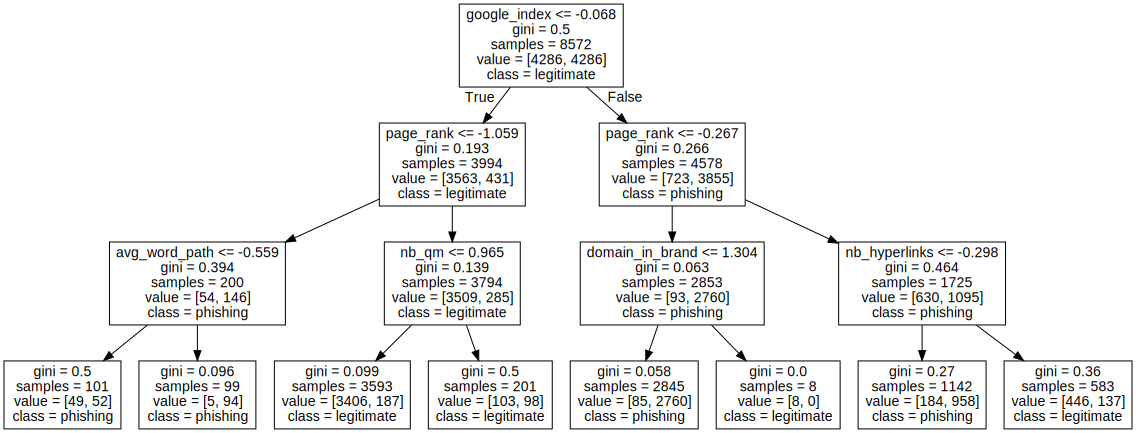

In [14]:
dtree = DecisionTreeClassifier(max_depth = 3).fit(X_train, y_train)

import graphviz
from sklearn import tree

#order of class names?
tree.export_graphviz(dtree, out_file="tree.dot", class_names=["legitimate","phishing"], feature_names = X.columns)

with open("tree.dot") as f:
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))

### Random Forest Classifier

In [15]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=0).fit(X_train, y_train)

print("Accuracy on training set: {:.4f}".format(rfc.score(X_train, y_train)))
print("Accuracy on test set: {:.4f}".format(rfc.score(X_test, y_test)))

Accuracy on training set: 1.0000
Accuracy on test set: 0.9612


In [16]:
#test of n-estimators
train_scores = []
test_scores = []

print("Train    Test   n_estimators")
for n in range(10, 500, 50):
    rfc = RandomForestClassifier(random_state = 0, n_estimators = n).fit(X_train, y_train)
       
    train = rfc.score(X_train, y_train)
    train_scores.append(train)
    
    test = rfc.score(X_test, y_test)   
    test_scores.append(test)

    print("{:.4f}   {:.4f}   {}  ".format(train, test, n))

Train    Test   n_estimators
0.9984   0.9500   10  
1.0000   0.9577   60  
1.0000   0.9612   110  
1.0000   0.9615   160  
1.0000   0.9619   210  
1.0000   0.9608   260  
1.0000   0.9615   310  
1.0000   0.9612   360  
1.0000   0.9622   410  
1.0000   0.9622   460  


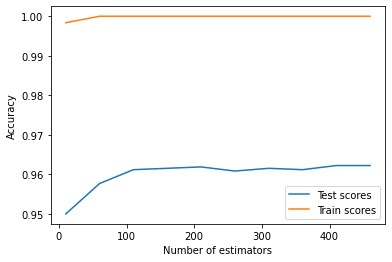

In [17]:
#plot train and test scores
#x axis - a list of the values for number of estimators
x = range(10,500,50)
#y axis - list of train scores
plt.plot(x, test_scores, label="Test scores")
plt.plot(x, train_scores, label="Train scores")
plt.ylabel("Accuracy")
plt.xlabel("Number of estimators")
plt.legend(loc="best")
#show the plots
plt.show()

### MLP

In [18]:
#MLP
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state = 0).fit(X_train, y_train)

print("Accuracy on training set: {:.4f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.4f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 1.0000
Accuracy on test set: 0.9535


In [49]:
#test of hidden layers
train_scores = []
test_scores = []

print("Test       Train       Number of hidden layers")
for n in range(100, 1001, 100):
    mlp = MLPClassifier(random_state = 0, hidden_layer_sizes=(n)).fit(X_train, y_train)
       
    train = mlp.score(X_train,y_train)
    train_scores.append(train)
    
    test = mlp.score(X_test,y_test)
    test_scores.append(test)
       
    print("{:.4f}     {:.4f}      {}  ".format(train, test, n))

Test       Train       Number of hidden layers
1.0000     0.9535      100  
1.0000     0.9559      200  
1.0000     0.9552      300  
1.0000     0.9566      400  
0.9920     0.9517      500  
0.9988     0.9559      600  
0.9991     0.9531      700  
0.9998     0.9528      800  
0.9999     0.9563      900  
0.9944     0.9531      1000  


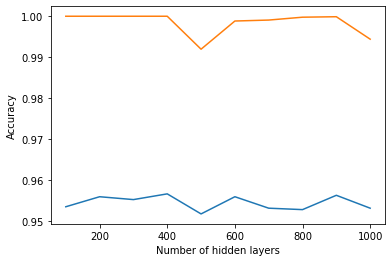

In [50]:
x = range(100, 1001, 100)

plt.plot(x, test_scores, label="Test scores")
plt.plot(x, train_scores, label="Train scores")
plt.ylabel("Accuracy")
plt.xlabel("Number of hidden layers")
plt.show()